Speed calculation

In [16]:
xd = np.diff(x,append=np.nan)
yd = np.diff(y,append=np.nan)
td = np.diff(time,append=np.nan)

In [17]:
D = np.sqrt(xd**2 + yd**2) # calculate the distance run at each position tracked

In [18]:
speed = D/td # get speed from distance

model formula

In [ ]:
rate = np.maximum(0,speed*w + b + e)
plt.scatter(speed,rate)
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Rate (Hz)")

Text(0, 0.5, 'Rate (Hz)')

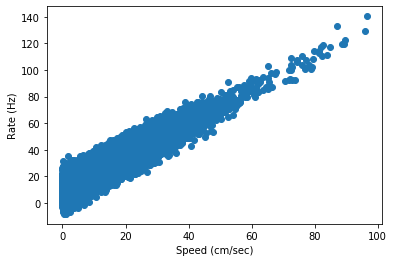

Untrain MSE

In [1]:
mse = np.mean((rate-yhat)**2)
# alternatively
mse = np.mean((rate-theta@x)**2)
print("MSE:",mse)

mse = np.mean((rate-yhat)**2)
mse

NameError: name 'np' is not defined

Trained model

In [ ]:
yhat = X@theta # predict the firing rate of the neuron using the optimize parameters

plt.scatter(speed,rate, label="Neuron")
plt.scatter(speed,yhat,label="Model")
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Rate (Hz)")
plt.legend()
plt.show()

In [ ]:
yhat = X@theta # predict the firing rate of the neuron using the optimize parameters

fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].scatter(speed,rate,label="Data")
ax[0].scatter(speed,untrained_yhat,label="Untrained Model")
ax[0].set_xlabel("Running speed (cm/sec)")
ax[0].set_ylabel("Firing rate (Hz)")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].legend()

ax[1].plot(mse)
ax[1].set_ylabel("Mean squared error (MSE)")
ax[1].set_xlabel("Iterations")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


ax[2].scatter(speed,rate,label="Data")
ax[2].scatter(speed,yhat,label="Trained Model")
ax[2].set_xlabel("Running speed (cm/sec)")
ax[2].set_ylabel("Firing rate (Hz)")
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].legend()

#fn = "../images/learning.png"
#plt.savefig(fn)


## Simulation for final exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fn = "../data/animal_speed.npy"

In [4]:
speed = np.load(fn)

In [8]:
speed

array([16.56109922, 18.39592726, 14.97058294, ..., 26.68191607,
       26.41183643, 26.29908668])

In [20]:
acceleration = np.concatenate([np.array([0]),np.diff(speed)])

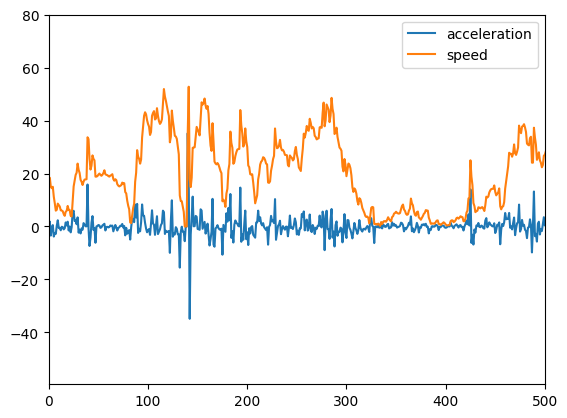

In [21]:
plt.plot(acceleration,label="acceleration")
plt.plot(speed,label="speed")
plt.xlim(0,500)
plt.legend()

Our model is as follows

$rate = speed*w_1 + acceleration*w_2 + b + error$

In [49]:
b = 15 # parameter 0
w1 = 1.5 # parameter 1
w2 = 0.5 # parameter 2
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution
rate = speed * w1 + acceleration*w2 + b + e
rate = np.maximum(0, rate) # eliminate the negative firing rates

In [50]:
fn = "../data/animal_acceleration.npy"
np.save(fn,acceleration)

In [51]:
fn =  "../data/y_rate.npy"
np.save(fn,rate)

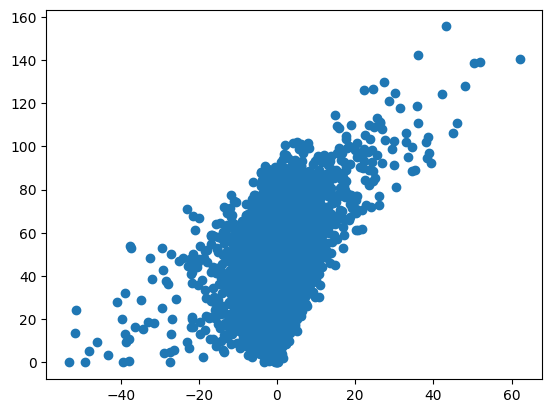

In [52]:
plt.scatter(acceleration,rate)

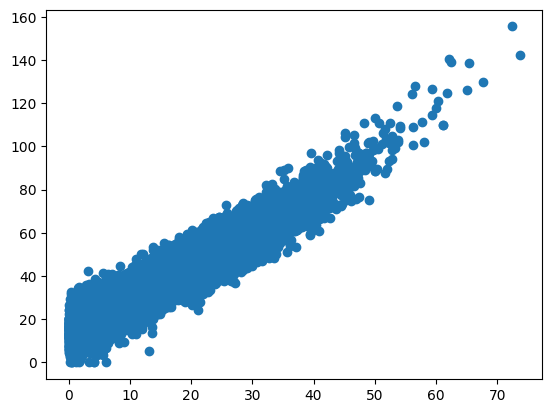

In [53]:
plt.scatter(speed,rate)

In [54]:
theta = np.array([[0.0,3.0,3]]) # random guess of the 3 model parameters, same as above
X = np.ones((3,speed.shape[0]))  # make a 2 rows array with ones in the first row and speed in the second row
X[1,:] = speed
X[2,:] = acceleration


In [55]:
theta.shape,X.shape

((1, 3), (3, 27304))

In [56]:
yhat = theta@X

In [57]:
rateM = rateM = np.expand_dims(rate,0) 

In [58]:
lr = 0.002 # learning rate
n_iterations = 6000 
m = rate.shape[0] # number of data points

#theta = np.random.rand(2) # set random parameters as a starting point
theta = np.array([[20.0,-2.0,0.1]]) 
print("theta at start:", theta)

# learning loop
for iteration in range(n_iterations):

    
    # make a prediction by feeding data to our model
    yhat = theta@X
    
    # calculate the gradients with the current parameters
    gradients = 2/m *(yhat - rateM) @ X.T
    
    # adjust the parameter so that we reduce the MSE
    theta = theta - lr * gradients

    if iteration%1000 == 0 or iteration<10:  # some information
        print("iteration:{}, gradients: {}".format(iteration,gradients))

print("optimized theta:",theta)

theta at start: [[20.  -2.   0.1]]
iteration:0, gradients: [[  -67.6776102  -1546.2720501    -52.12521638]]
iteration:1, gradients: [[  1.2353881  -82.22559092 -12.02429294]]
iteration:2, gradients: [[ 4.8806277  -4.36227157 -9.44280452]]
iteration:3, gradients: [[ 5.05476891 -0.23124192 -8.87851723]]
iteration:4, gradients: [[ 5.04482781 -0.02159886 -8.44199233]]
iteration:5, gradients: [[ 5.02561936 -0.02003697 -8.03174774]]
iteration:6, gradients: [[ 5.00641782 -0.02906493 -7.64145205]]
iteration:7, gradients: [[ 4.9876933  -0.03820086 -7.26987974]]
iteration:8, gradients: [[ 4.96944872 -0.04690907 -6.91611945]]
iteration:9, gradients: [[ 4.95166318 -0.05518186 -6.57931709]]
iteration:1000, gradients: [[ 0.74005914 -0.03534293  0.01838409]]
iteration:2000, gradients: [[ 0.11272518 -0.00538341  0.00280025]]
iteration:3000, gradients: [[ 0.0171702  -0.00082     0.00042653]]
iteration:4000, gradients: [[ 2.61535071e-03 -1.24901044e-04  6.49689329e-05]]
iteration:5000, gradients: [[ 3.9